In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import os

In [82]:
!ls ../pruebas/ablacion/C1D_C2D/

train_log.csv  weights.pmt


# Load Data

In [2]:
DATA_PATH = '../pruebas/crossFamily/data/'
ABLATIONS_PATH = '../pruebas/ablacion/'
CROSSFAMILY_PATH = '../pruebas/crossFamily/weights/'
TRAIN_LOG = '/train_log.csv'

ablations = os.listdir(ABLATIONS_PATH)
train_data = os.listdir(DATA_PATH) 
cross_families = os.listdir(CROSSFAMILY_PATH)

print(ablations)
print(train_data)
print(cross_families)

['C1D_C2D', 'no_ResNet_2d']
['train_telomerase.csv', 'train_tRNA.csv', 'test_tRNA.csv', 'test_RNaseP.csv', 'test_telomerase.csv', 'train_RNaseP.csv']
['tRNA', 'RNaseP', 'telomerase']


In [3]:
data = {data : pd.read_csv(DATA_PATH + data) for data in train_data}

In [4]:
losses_ablations = {ablation : pd.read_csv(ABLATIONS_PATH + ablation + TRAIN_LOG) for ablation in ablations}

In [5]:
losses_cross_families = ({ 
    ablation: {
        crossFamily: ( 
            pd.read_csv(CROSSFAMILY_PATH + crossFamily + '/' + ablation + TRAIN_LOG)
            if os.path.exists(CROSSFAMILY_PATH + crossFamily + '/' + ablation + TRAIN_LOG)
            else None
        )
        for crossFamily in cross_families
    }
    for ablation in ablations
})


# Train Error Analysis

In [6]:
losses_cross_families

{'C1D_C2D': {'tRNA':     epoch  train_f1  train_loss  valid_f1  valid_f1_post  valid_loss
  0       0    0.2307      0.0666    0.2781         0.2716      0.0526
  1       1    0.2908      0.0506    0.2805         0.3121      0.0494
  2       2    0.3079      0.0483    0.3112         0.3367      0.0465
  3       3    0.3230      0.0464    0.3304         0.3528      0.0445
  4       4    0.3379      0.0453    0.3535         0.3631      0.0429
  5       5    0.3548      0.0433    0.3596         0.3823      0.0415
  6       6    0.3699      0.0425    0.3766         0.4119      0.0406
  7       7    0.3892      0.0409    0.3971         0.4193      0.0395
  8       8    0.4063      0.0399    0.4105         0.4121      0.0402
  9       9    0.4156      0.0392    0.4193         0.4554      0.0379
  10     10    0.4297      0.0381    0.4242         0.4661      0.0371
  11     11    0.4412      0.0369    0.4344         0.4741      0.0363
  12     12    0.4515      0.0365    0.4514         0.4867

In [7]:
losses_cross_families['no_ResNet_2d']['RNaseP'].columns

Index(['epoch', 'train_f1', 'train_loss', 'valid_f1', 'valid_f1_post',
       'valid_loss'],
      dtype='object')

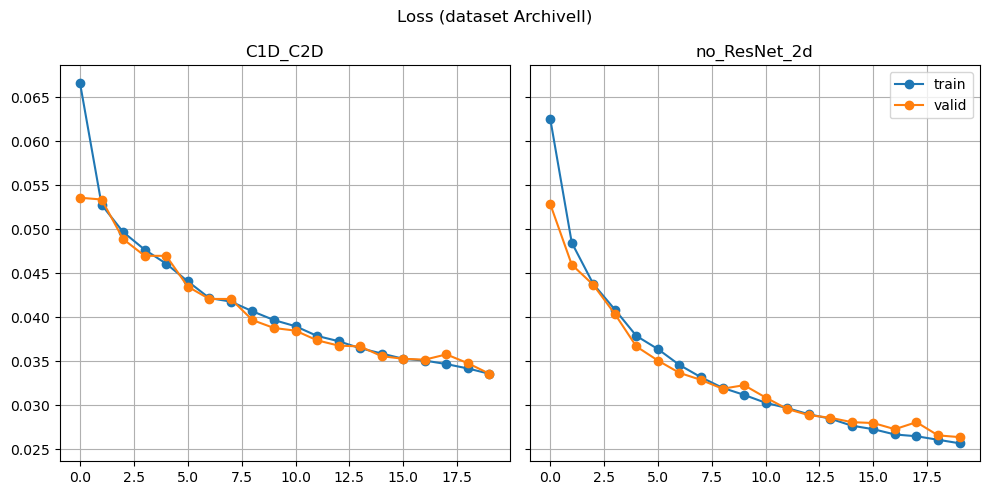

In [89]:

fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
for n, ablation in enumerate(ablations):
    df = losses_ablations[ablation]
    ax[n].plot(df.epoch, df.train_loss, marker='o', label='train')
    ax[n].plot(df.epoch, df.valid_loss, marker='o', label='valid')
    ax[n].set_title(f'{ablation}')
    ax[n].grid()
ax[1].legend()
fig.suptitle('Loss (dataset ArchiveII)')
fig.tight_layout()
plt.show()

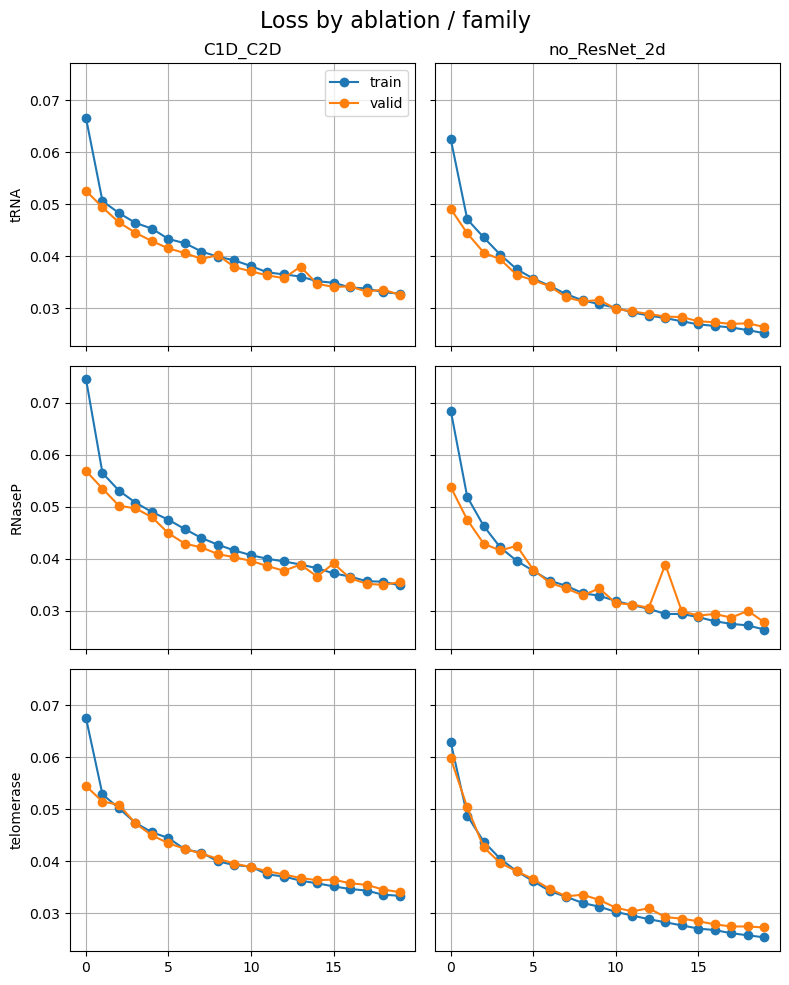

In [90]:
fig, ax = plt.subplots(3,2, figsize=(8,10), sharey=True, sharex=True)
for i, crossFamily in enumerate(cross_families):
    
    ax[i, 0].set_ylabel(f'{crossFamily}')
    for n, ablation in enumerate(ablations):
        ax[0, n].set_title(f'{ablation}')
        df = losses_cross_families[ablation][crossFamily]
        ax[i, n].grid()
        if df is None:
            pass
        else:
            ax[i, n].plot(df.epoch, df.train_loss, marker='o', label='train')
            ax[i, n].plot(df.epoch, df.valid_loss, marker='o', label='valid') 
ax[0,0].legend()
fig.suptitle('Loss by ablation / family',fontsize=16)
fig.tight_layout()
plt.show()

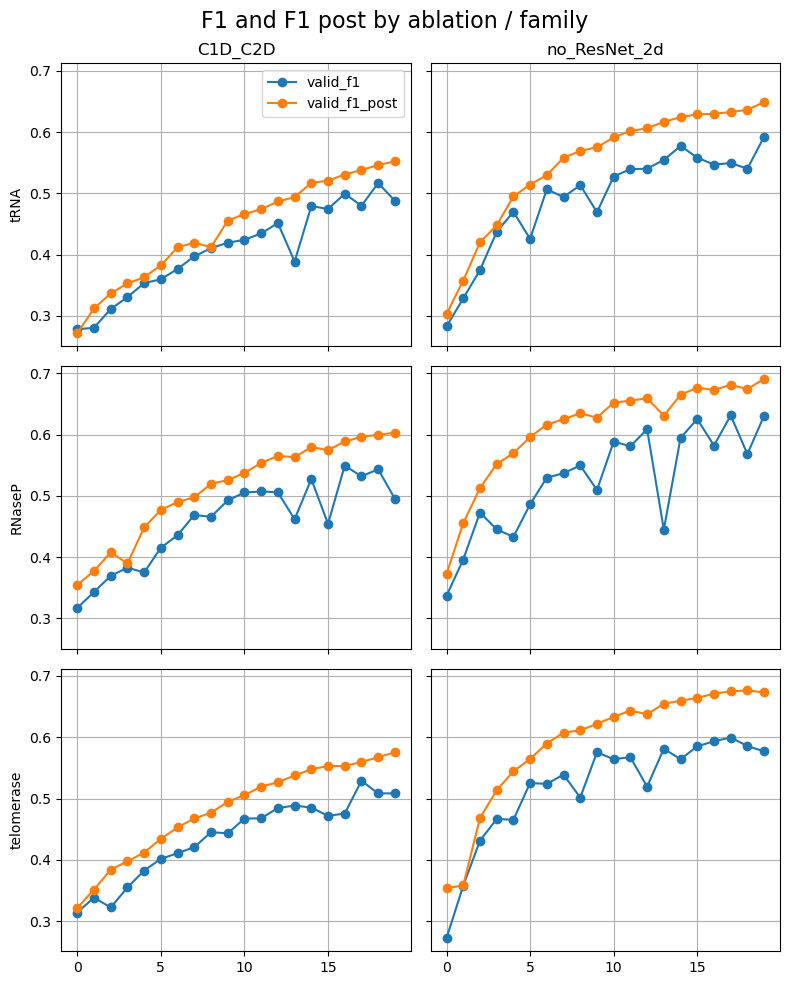

In [91]:
# fig, ax = plt.subplots(2,4)

fig, ax = plt.subplots(3,2, figsize=(8,10), sharey=True, sharex=True)
for i, crossFamily in enumerate(cross_families):
    
    ax[i, 0].set_ylabel(f'{crossFamily}')
    for n, ablation in enumerate(ablations):
        ax[0, n].set_title(f'{ablation}')
        df = losses_cross_families[ablation][crossFamily]
        ax[i, n].grid()
        if df is None:
            pass
        else:
            ax[i, n].plot(df.epoch, df.valid_f1 , marker='o', label='valid_f1')
            ax[i, n].plot(df.epoch, df.valid_f1_post, marker='o', label='valid_f1_post')  

ax[0,0].legend()
fig.suptitle('F1 and F1 post by ablation / family',fontsize=16)
fig.tight_layout()
plt.show()

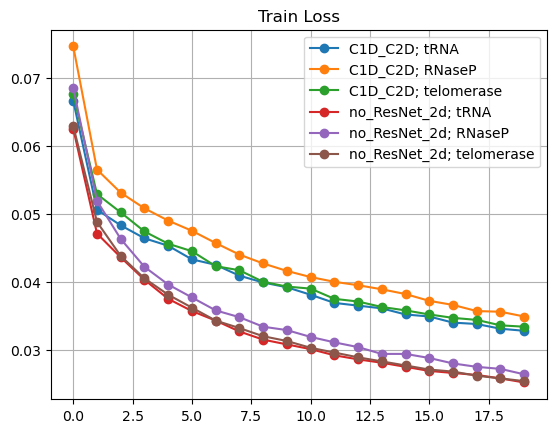

In [8]:
# fig, ax = plt.subplots(2,4)

fig, ax = plt.subplots()
for n, ablation in enumerate(ablations):
    for i, crossFamily in enumerate(cross_families):
        df = losses_cross_families[ablation][crossFamily]
        if df is None:
            pass
        else:
            ax.plot(df.epoch, df.train_loss, marker='o', label=f'{ablation}; {crossFamily}')
            # ax.plot(df.epoch, df.valid_loss, marker='o', label='valid') 
ax.grid()
ax.set_title(f'Train Loss')    
plt.legend()
plt.show()

In [ ]:
# fig, ax = plt.subplots(2,4)

fig, ax = plt.subplots()
for n, ablation in enumerate(ablations):
    for i, crossFamily in enumerate(cross_families):
        df = losses_cross_families[ablation][crossFamily]
        if df is None:
            pass
        else:
            ax.plot(df.epoch, df.train_loss, marker='o', label=f'{ablation}; {crossFamily}')
            # ax.plot(df.epoch, df.valid_loss, marker='o', label='valid') 
ax.grid()
ax.set_title(f'Train Loss')    
plt.legend()
plt.show()

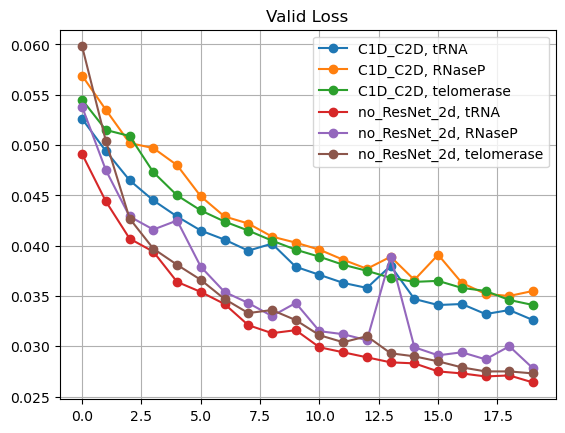

In [93]:
# fig, ax = plt.subplots(2,4)

fig, ax = plt.subplots()
for n, ablation in enumerate(ablations):
    for i, crossFamily in enumerate(cross_families):
        df = losses_cross_families[ablation][crossFamily]
        if df is None:
            pass
        else: 
            ax.plot(df.epoch, df.valid_loss, marker='o', label=f'{ablation}, {crossFamily}') 
ax.grid()
ax.set_title(f'Valid Loss')    
plt.legend()
plt.show()

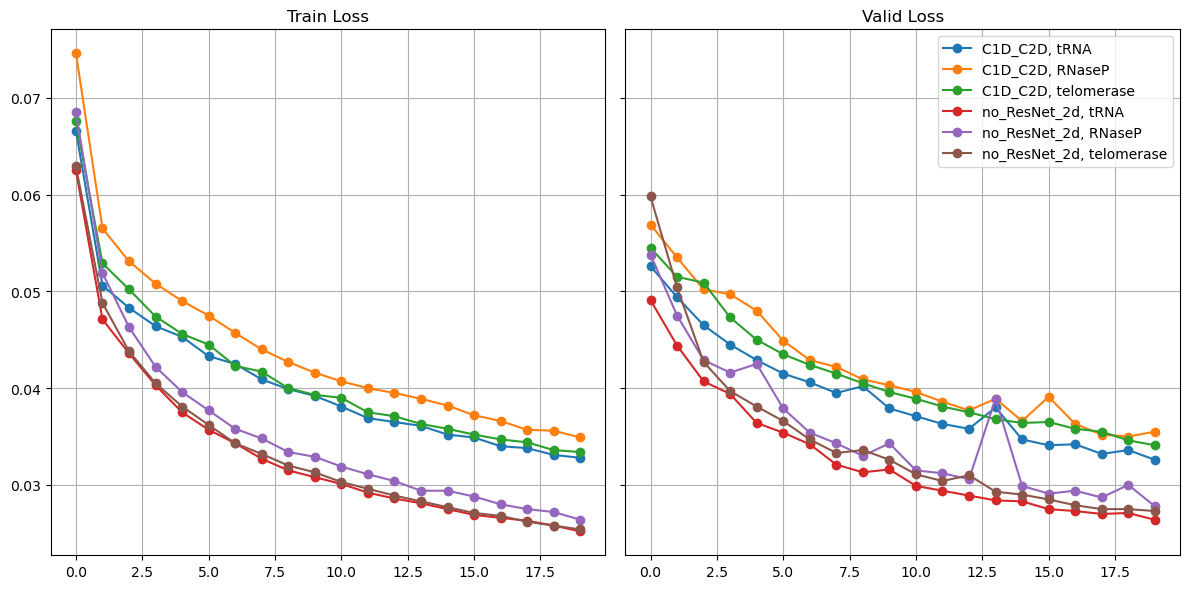

In [94]:
fig, axes = plt.subplots(1,2, figsize = (12,6), sharey=True)
for n, ablation in enumerate(ablations):
    for i, crossFamily in enumerate(cross_families):
        df = losses_cross_families[ablation][crossFamily]
        if df is None:
            pass
        else: 
            axes[0].plot(df.epoch, df.train_loss, marker='o', label=f'{ablation}, {crossFamily}') 
            axes[1].plot(df.epoch, df.valid_loss, marker='o', label=f'{ablation}, {crossFamily}') 
for ax in axes: ax.grid()
axes[0].set_title(f'Train Loss')    
axes[1].set_title(f'Valid Loss')    
axes[1].legend()
fig.tight_layout()
plt.show()

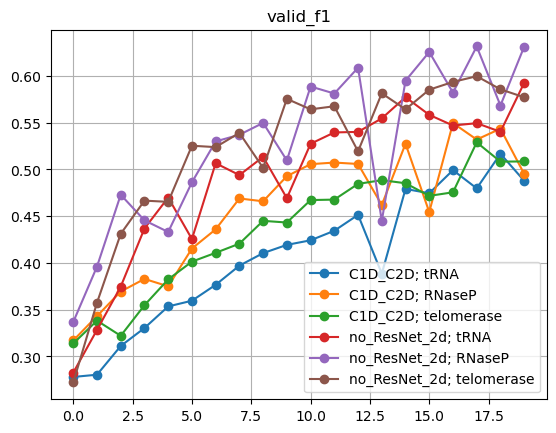

In [96]:
# fig, ax = plt.subplots(2,4)

fig, ax = plt.subplots()
for n, ablation in enumerate(ablations):
    for i, crossFamily in enumerate(cross_families):
        df = losses_cross_families[ablation][crossFamily]
        if df is None:
            pass
        else:
            ax.plot(df.epoch, df.valid_f1, marker='o', label=f'{ablation}; {crossFamily}')
            # ax.plot(df.epoch, df.valid_loss, marker='o', label='valid') 
ax.grid()
ax.set_title(f'valid_f1')    
plt.legend()
plt.show()

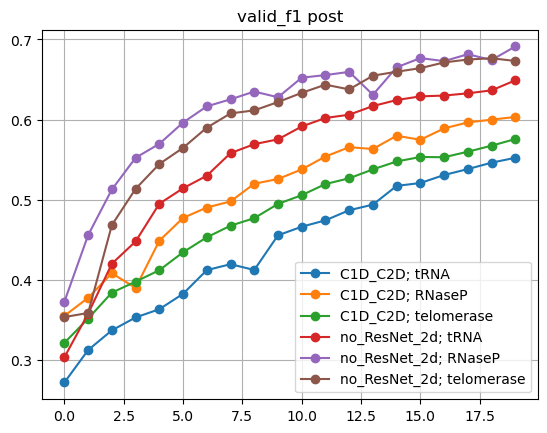

In [97]:
# fig, ax = plt.subplots(2,4)

fig, ax = plt.subplots()
for n, ablation in enumerate(ablations):
    for i, crossFamily in enumerate(cross_families):
        df = losses_cross_families[ablation][crossFamily]
        if df is None:
            pass
        else:
            ax.plot(df.epoch, df.valid_f1_post, marker='o', label=f'{ablation}; {crossFamily}')
            # ax.plot(df.epoch, df.valid_loss, marker='o', label='valid') 
ax.grid()
ax.set_title(f'valid_f1 post')    
plt.legend()
plt.show()

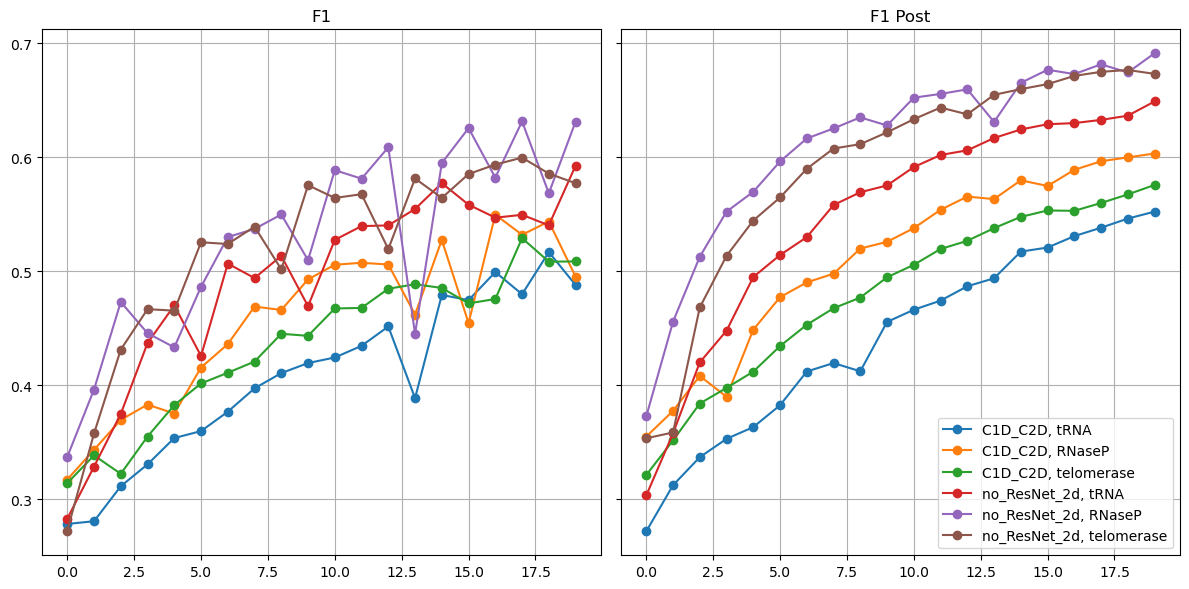

In [98]:
fig, axes = plt.subplots(1,2, figsize = (12,6), sharey=True)
for n, ablation in enumerate(ablations):
    for i, crossFamily in enumerate(cross_families):
        df = losses_cross_families[ablation][crossFamily]
        if df is None:
            pass
        else: 
            axes[0].plot(df.epoch, df.valid_f1, marker='o', label=f'{ablation}, {crossFamily}') 
            axes[1].plot(df.epoch, df.valid_f1_post, marker='o', label=f'{ablation}, {crossFamily}') 
for ax in axes: ax.grid()
axes[0].set_title(f'F1')    
axes[1].set_title(f'F1 Post')    
axes[1].legend()
fig.tight_layout()
plt.show()

# Df unificado

In [10]:
import os
import pandas as pd

ABLATIONS_PATH = '../pruebas/ablacion/'
CROSSFAMILY_PATH = '../pruebas/crossFamily/weights/'

# Listado de ablations y homologies
ablations = os.listdir(ABLATIONS_PATH)
print(f"Ablations: {ablations}")

cross_families = os.listdir(CROSSFAMILY_PATH)
print(f"cross families: {cross_families}")

# Inicializamos una lista para almacenar los DataFrames de los archivos train_log.csv
train_logs = []

# Recorrer cada crossFamily y ablation para buscar los archivos train_log.csv
for crossFamily in cross_families:
    for ablation in ablations:
        # Ruta del subdirectorio donde se encuentran los archivos train_log.csv
        train_file_path = os.path.join(CROSSFAMILY_PATH, crossFamily, ablation)
        
        # Verificamos si el directorio existe
        if os.path.isdir(train_file_path):
            # Verificar si el archivo 'train_log.csv' existe en el directorio
            train_file = 'train_log.csv'
            full_path = os.path.join(train_file_path, train_file)
            
            # Si el archivo existe, lo leemos
            if os.path.exists(full_path):
                try:
                    df = pd.read_csv(full_path)
                    
                    # Agregar columnas de 'ablation' y 'crossFamily'
                    df['ablation'] = ablation
                    df['crossFamily'] = crossFamily
                    
                    # Agregar el DataFrame a la lista
                    train_logs.append(df)
                    print(f"Successfully loaded {full_path}")
                except Exception as e:
                    print(f"Error loading {full_path}: {e}")

# Combinar todos los DataFrames en uno solo
if train_logs:
    combined_train_log = pd.concat(train_logs, ignore_index=True)
    print(f"Total rows in combined DataFrame: {combined_train_log.shape[0]}")
else:
    combined_train_log = pd.DataFrame()  # DataFrame vacío si no hay archivos cargados

# El DataFrame 'combined_train_log' contiene todos los datos de train_log.csv, con las columnas 'ablation' y 'crossFamily'


Ablations: ['C1D_C2D', 'no_ResNet_2d']
cross families: ['tRNA', 'RNaseP', 'telomerase']
Successfully loaded ../pruebas/crossFamily/weights/tRNA/C1D_C2D/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/tRNA/no_ResNet_2d/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/C1D_C2D/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/RNaseP/no_ResNet_2d/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/C1D_C2D/train_log.csv
Successfully loaded ../pruebas/crossFamily/weights/telomerase/no_ResNet_2d/train_log.csv
Total rows in combined DataFrame: 120


In [11]:
combined_train_log

,epoch,train_f1,train_loss,valid_f1,valid_f1_post,valid_loss,ablation,crossFamily
0,0,0.2307,0.0666,0.2781,0.2716,0.0526,C1D_C2D,tRNA
1,1,0.2908,0.0506,0.2805,0.3121,0.0494,C1D_C2D,tRNA
2,2,0.3079,0.0483,0.3112,0.3367,0.0465,C1D_C2D,tRNA
3,3,0.3230,0.0464,0.3304,0.3528,0.0445,C1D_C2D,tRNA
4,4,0.3379,0.0453,0.3535,0.3631,0.0429,C1D_C2D,tRNA
...,...,...,...,...,...,...,...,...
115,15,0.5986,0.0271,0.5852,0.6641,0.0285,no_ResNet_2d,telomerase
116,16,0.6062,0.0268,0.5935,0.6713,0.0279,no_ResNet_2d,telomerase
117,17,0.6101,0.0262,0.5996,0.6749,0.0275,no_ResNet_2d,telomerase
118,18,0.6149,0.0258,0.5856,0.6765,0.0275,no_ResNet_2d,telomerase


<Axes: xlabel='epoch', ylabel='train_loss'>

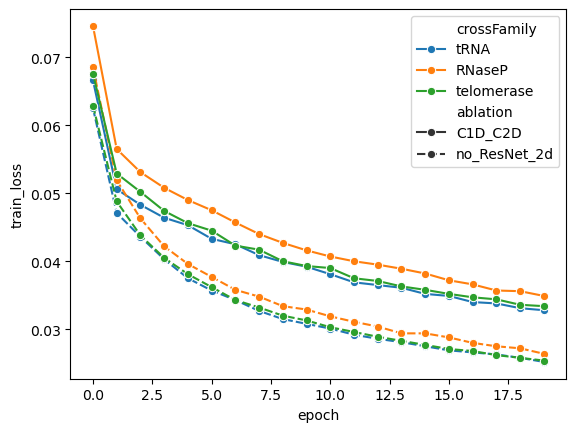

In [19]:
sns.lineplot(data=combined_train_log, x='epoch' ,y='train_loss',hue='crossFamily', style='ablation', marker='o')

In [13]:
combined_train_log.columns

Index(['epoch', 'train_f1', 'train_loss', 'valid_f1', 'valid_f1_post',
       'valid_loss', 'ablation', 'crossFamily'],
      dtype='object')

In [ ]:
sns